In [1]:
# Importando Bibliotecas

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, Markdown
from sklearn.pipeline import TransformerMixin
from scipy.spatial.distance import cdist

In [2]:
# Importando o Dataset

from sklearn.datasets import fetch_california_housing
california_dataset = fetch_california_housing()

In [3]:
# Exibindo o conteúdo do dataset

display(Markdown("**Conteúdo do Dataset:**"))
display(california_dataset.keys()) # Obtendo as chaves da dict 'california_dataset'
display(Markdown("- data: Contém as informações dos atributos das residências"))
display(Markdown("- target: Contém os valores das residências"))
display(Markdown("- target_names: Contém o nome da variável target"))
display(Markdown("- feature_names: Contém os nomes dos atributos das residências"))
display(Markdown("- DESCR: Contém a descrição do dataset"))

**Conteúdo do Dataset:**

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

- data: Contém as informações dos atributos das residências

- target: Contém os valores das residências

- target_names: Contém o nome da variável target

- feature_names: Contém os nomes dos atributos das residências

- DESCR: Contém a descrição do dataset

In [4]:
# Exibindo a descrição do dataset

display(Markdown("**Descrição do Dataset:**"))
print(california_dataset.DESCR)

**Descrição do Dataset:**

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
#  Carregando o dataset com o Pandas

display(Markdown("**Dataset sem a Variável Target:**"))
california = pd.DataFrame(data=california_dataset.data, columns=california_dataset.feature_names)  # Carregando os dados associados à chave 'data' da dict no dataframe pandas e associando as colunas do dataframe aos valores associados à chave 'feature_names'
california

**Dataset sem a Variável Target:**

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
# Incluindo a Variável Target no dataset

display(Markdown("**Dataset com a Variável Target:**"))
california[california_dataset.target_names[0]] = california_dataset.target
california

**Dataset com a Variável Target:**

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
# Contando os valores faltantes para cada atributo

display(Markdown("**Quantidade de valores faltantes para cada atributo:**"))
california.isnull().sum()

**Quantidade de valores faltantes para cada atributo:**

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [8]:
# Descrevendo estatísticas da distribuição dos valores dos atributos do dataset

display(Markdown("**Estatísticas Descritivas:**"))
california.describe()

**Estatísticas Descritivas:**

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**Histograma da Distribuição do valor das casas:**

<AxesSubplot:xlabel='MedHouseVal', ylabel='Density'>

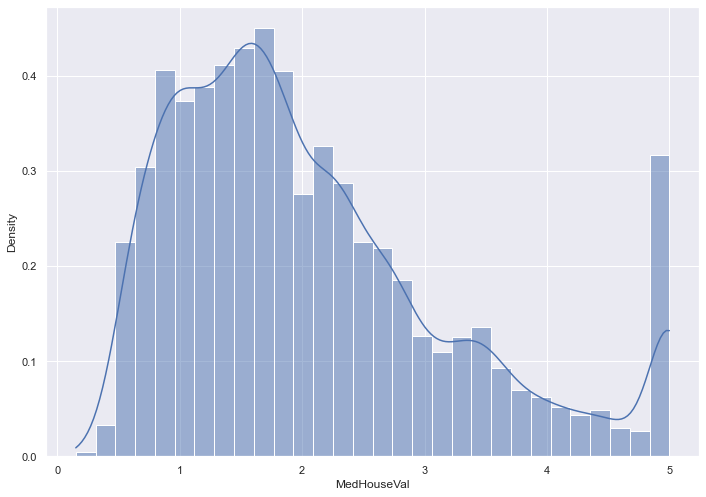

In [9]:
# Exibindo um histograma da distribuição da variável target (MedHouseVal)

display(Markdown("**Histograma da Distribuição do valor das casas:**"))
sns.set(rc={"figure.figsize":(11.7,8.27)})  # Redimensiona os gráficos plotados pelo seaborn
sns.histplot(california["MedHouseVal"], bins=30, stat="density", kde=True)  # Plota o histograma com a densidade de frequência dos valores das residências (Com 30 colunas e estimativa de densidade de Kernel)

**Matriz de Correlação das Variáveis:**

<AxesSubplot:>

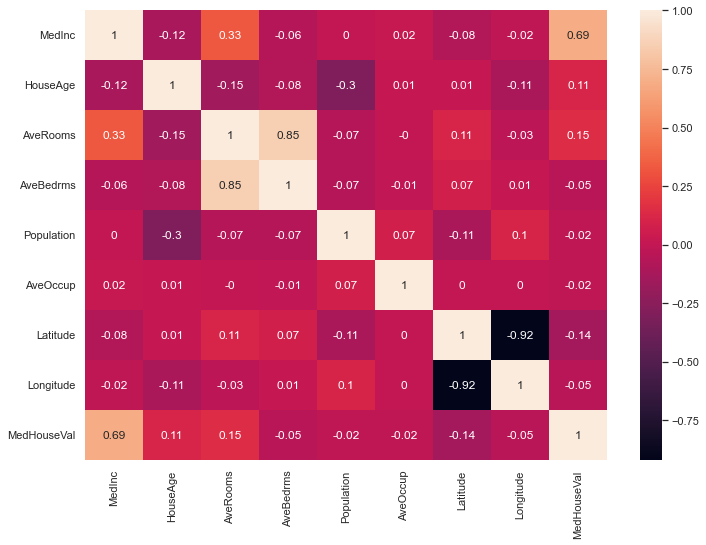

In [10]:
# Exibindo a matriz de correlação das variáveis

display(Markdown("**Matriz de Correlação das Variáveis:**"))
correlation_matrix = california.corr().round(2)  # Obtém a correlação entre os atributos do dataframe e arredonda os coeficientes para 2 casas decimais
sns.heatmap(correlation_matrix, annot=True)  # Plota o mapa de calor da matrix de correlação com seus respectivos coeficientes

**Gráfico de Dispersão da Renda Mediana em relação ao Valor Médio das casas:**

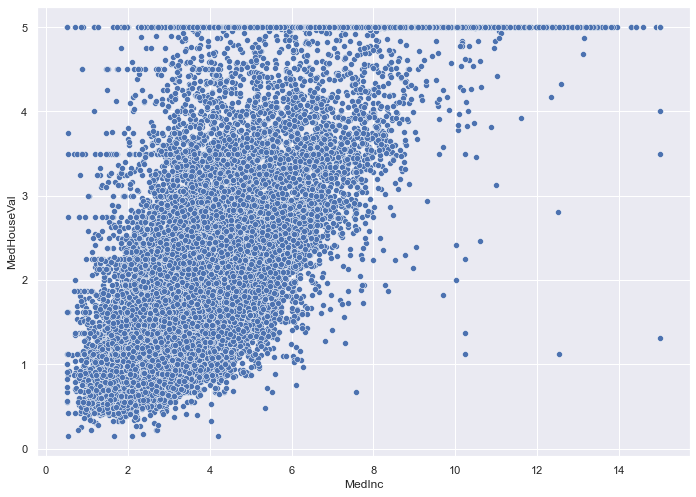

In [11]:
# Exibindo o gráfico de dispersão da variável MedInc (Renda Mediana) em relação à variável target (MedHouseVal)

display(Markdown("**Gráfico de Dispersão da Renda Mediana em relação ao Valor Médio das casas:**"))
ax = sns.scatterplot(x=california["MedInc"], y=california["MedHouseVal"], marker="o")

In [20]:
# Transformador para remoção de outliers pelo método dos desvios padrões 

class OutlierExtractor(TransformerMixin):
    def __init__(self, threshold=3, columns=None):
        self.threshold = threshold
        self.columns = columns
        
        
    def fit(self, X, y=None):
        self.outliers_zscore = dict()
        if self.columns is None:
            self.columns = X.columns
            
        for column in self.columns:
            x = np.asarray(X[column]).reshape(-1,1)
            std = np.std(x)
            self.outliers_zscore[column] = (np.abs(cdist(x.mean(axis=0)[np.newaxis], x) / std)[0])
            
        return self
    
    
    def transform(self, X):
        pos_outliers = []
        pos_outliers = np.array(pos_outliers)
        
        for column in self.columns:
            pos_outliers = np.concatenate((np.where(self.outliers_zscore[column] > self.threshold), pos_outliers), axis=None)
            
        return X.drop(set(pos_outliers), inplace=False)

In [14]:
outlierExtractor = OutlierExtractor(columns=['MedInc'])
california_new = outlierExtractor.fit_transform(california)

**Boxplot da Renda Mediana antes da remoção de outliers:**

<AxesSubplot:xlabel='MedInc'>

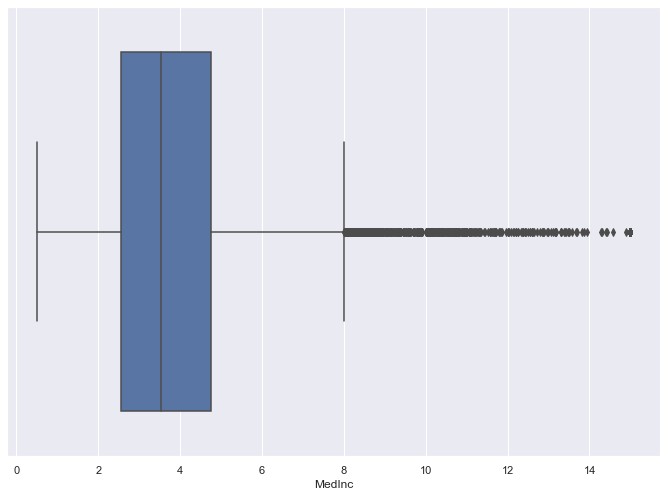

In [19]:
# Exibindo o boxplot da variável MedInc (Renda Mediana) antes da remoção de outliers

display(Markdown("**Boxplot da Renda Mediana antes da remoção de outliers:**"))
sns.boxplot(x=california["MedInc"], orient='h')

**Boxplot da Renda Mediana depois da remoção de outliers (pelo método dos desvios padrões):**

<AxesSubplot:xlabel='MedInc'>

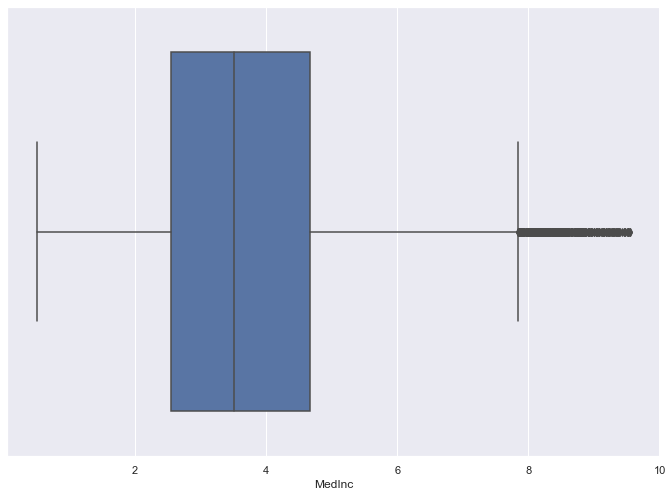

In [18]:
# Exibindo o boxplot da variável MedInc (Renda Mediana) depois da remoção de outliers

display(Markdown("**Boxplot da Renda Mediana depois da remoção de outliers (pelo método dos desvios padrões):**"))
sns.boxplot(x=california_new["MedInc"], orient='h')

In [36]:
from sklearn.model_selection import train_test_split

x_train_with_outliers, x_test_with_outliers, y_train_with_outliers, y_test_with_outliers = train_test_split(california["MedInc"], california["MedHouseVal"], test_size=0.2, random_state=5)  # Divide o conjunto de dados em conjunto de treinamento e conjunto de teste, atribuindo 20% das observações a este
x_train_without_outliers, x_test_without_outliers, y_train_without_outliers, y_test_without_outliers = train_test_split(california_new["MedInc"], california_new["MedHouseVal"], test_size=0.2, random_state=5) 


display(Markdown("**Divisão do conjunto de Dados para treinamento e teste:**"))
print("Legenda: (Quantidade de amostras (Linhas), Quantidade de atributos (colunas))")
print("(Quando a quantidade de colunas é 1, ela é omitida)")
print(x_train_with_outliers.shape)
print(x_test_with_outliers.shape)
print(y_train_with_outliers.shape)
print(y_test_with_outliers.shape)

x_train_with_outliers = np.array(x_train_with_outliers).reshape(-1,1)  #Explicita o número de colunas no shape para que não haja erros no treinamento do modelo
x_test_with_outliers = np.array(x_test_with_outliers).reshape(-1,1)
x_train_without_outliers = np.array(x_train_without_outliers).reshape(-1,1)
x_test_without_outliers = np.array(x_test_without_outliers).reshape(-1,1)
print("\nApós a explicitação da quantidade de colunas em X de treinamento e X de teste:")
print(x_train_with_outliers.shape)
print(x_test_with_outliers.shape)

**Divisão do conjunto de Dados para treinamento e teste:**

Legenda: (Quantidade de amostras (Linhas), Quantidade de atributos (colunas))
(Quando a quantidade de colunas é 1, ela é omitida)
(16512,)
(4128,)
(16512,)
(4128,)

Após a explicitação da quantidade de colunas em X de treinamento e X de teste:
(16512, 1)
(4128, 1)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model_with_outliers = LinearRegression()  # Constroi um modelo de regressão linear
lin_model_with_outliers.fit(x_train_with_outliers, y_train_with_outliers)  # Ajusta (treina) o modelo fornecendo a ele a variável independente (x) e a variável target (y)

lin_model_without_outliers = LinearRegression()
lin_model_without_outliers.fit(x_train_without_outliers, y_train_without_outliers)

LinearRegression()

In [45]:
display(Markdown("**Coeficientes da Equação da Reta para o modelo com outliers:**"))
y_intercept = lin_model.predict(np.array([0]).reshape(-1,1)) # Calcula o coeficinete linear da equação da reta obtida pelo modelo
steepness = (lin_model.predict(np.array([1]).reshape(-1,1)) - y_intercept[0]) # Calcula o coeficiente angular da equação da reta obtida pelo modelo
print("Coeficiente Linear: ", y_intercept[0], "\nCoeficiente Angular: ", steepness[0])

**Coeficientes da Equação da Reta para o modelo com outliers:**

Coeficiente Linear:  0.45036680658207295 
Coeficiente Angular:  0.41715892949891464


In [47]:
display(Markdown("**Coeficientes da Equação da Reta para o modelo sem outliers:**"))
print("Coeficiente Linear: ", lin_model_without_outliers.intercept_, "\nCoeficiente Angular: ", lin_model_without_outliers.coef_[0])

**Coeficientes da Equação da Reta para o modelo sem outliers:**

Coeficiente Linear:  0.3252756810057704 
Coeficiente Angular:  0.45408516679435396


**Gráfico de Dispersão da Renda Mediana em relação ao Valor Médio das casas com a reta de regressão para o modelo com outliers:**

Text(0, 0.5, 'MedHouseVal')

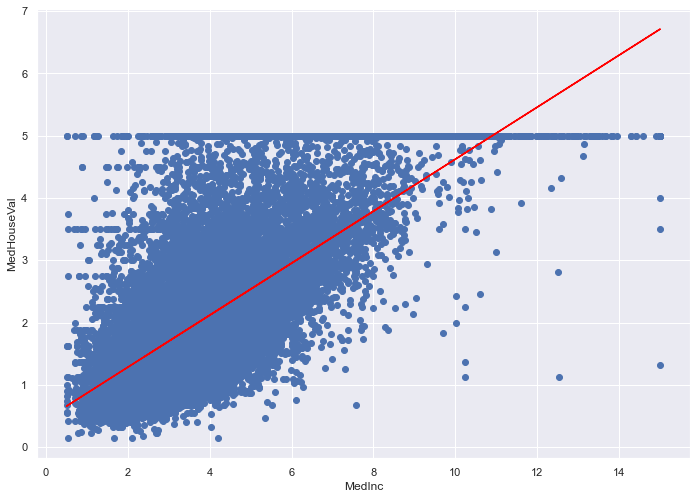

In [48]:
display(Markdown("**Gráfico de Dispersão da Renda Mediana em relação ao Valor Médio das casas com a reta de regressão para o modelo com outliers:**"))
x = california["MedInc"]
plt.scatter(x, california['MedHouseVal'])
plt.plot(x, y_intercept[0] + steepness[0] * x, '-', color='red')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')

**Gráfico de Dispersão da Renda Mediana em relação ao Valor Médio das casas com a reta de regressão para o modelo sem outliers:**

Text(0, 0.5, 'MedHouseVal')

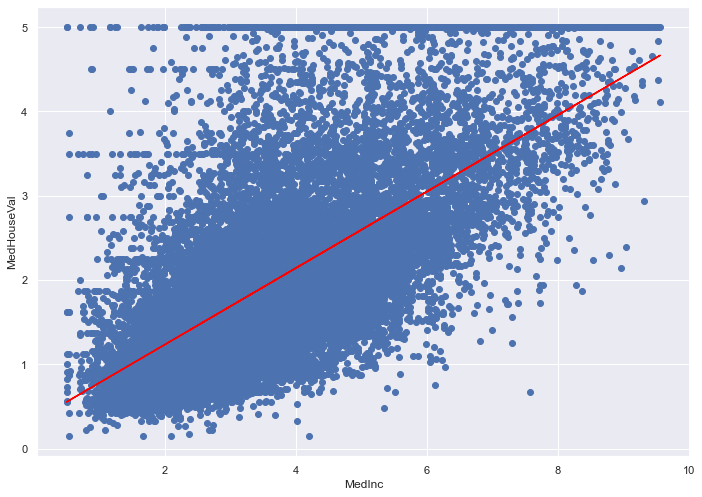

In [49]:
display(Markdown("**Gráfico de Dispersão da Renda Mediana em relação ao Valor Médio das casas com a reta de regressão para o modelo sem outliers:**"))
x = california_new["MedInc"]
plt.scatter(x, california_new['MedHouseVal'])
plt.plot(x, lin_model_without_outliers.intercept_ + lin_model_without_outliers.coef_[0] * x, '-', color='red')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')

In [40]:
# Avaliação do Modelo com os dados de Treinamento

y_train_predict_with_outliers = lin_model_with_outliers.predict(x_train_with_outliers)  # Solicita a predição do valor target das amostras de treinamento e armazena na variável
rmse = (np.sqrt(mean_squared_error(y_train_with_outliers,y_train_predict_with_outliers)))  # Calcula o RMSE (Raiz quadrada da média do somatório dos residuais)
r2 = r2_score(y_train_with_outliers, y_train_predict_with_outliers)  # Calcula o R2 Score (Quantidade da variância dos dados que é explicada pelo modelo)

display(Markdown("**Performance do modelo para dados de treinamento com outliers**"))
print('RMSE: {}'.format(rmse))
print('R2: {}'.format(r2))
print("\n")
print("--------------------------------------")

# Avaliação do Modelo com os dados de Teste

y_test_predict_with_outliers = lin_model_with_outliers.predict(x_test_with_outliers)  # Solicita a predição do valor target das amostras de teste e armazena na variável
rmse = (np.sqrt(mean_squared_error(y_test_with_outliers, y_test_predict_with_outliers)))
r2 = r2_score(y_test_with_outliers, y_test_predict_with_outliers)

display(Markdown("**Performance do modelo para dados de teste com outliers**"))
print('RMSE: {}'.format(rmse))
print('R2: {}'.format(r2))
print("\n")


y_train_predict_without_outliers = lin_model_without_outliers.predict(x_train_without_outliers)  
rmse = (np.sqrt(mean_squared_error(y_train_without_outliers,y_train_predict_without_outliers)))  
r2 = r2_score(y_train_without_outliers, y_train_predict_without_outliers)  

display(Markdown("**Performance do modelo para dados de treinamento sem outliers**"))
print('RMSE: {}'.format(rmse))
print('R2: {}'.format(r2))
print("\n")
print("--------------------------------------")


y_test_predict_without_outliers = lin_model_without_outliers.predict(x_test_without_outliers) 
rmse = (np.sqrt(mean_squared_error(y_test_without_outliers, y_test_predict_without_outliers)))
r2 = r2_score(y_test_without_outliers, y_test_predict_without_outliers)

display(Markdown("**Performance do modelo para dados de teste sem outliers**"))
print('RMSE: {}'.format(rmse))
print('R2: {}'.format(r2))
print("\n")

**Performance do modelo para dados de treinamento com outliers**

RMSE: 0.8359223196455025
R2: 0.47039428463925437


--------------------------------------


**Performance do modelo para dados de teste com outliers**

RMSE: 0.8430087153316839
R2: 0.48490837623606453




**Performance do modelo para dados de treinamento sem outliers**

RMSE: 0.8343330590219109
R2: 0.43112820410918995


--------------------------------------


**Performance do modelo para dados de teste sem outliers**

RMSE: 0.8220739654621317
R2: 0.43578997354303683




- Pode-se observar que, para o treinamento com outliers, o modelo explica 47% das amostras de treinamento e 48% das amostras de teste e para o treinamento sem outliers, o modelo explica 43% das amostras de treinamento e de teste